In [0]:
%tensorflow_version 2.x
%load_ext tensorboard

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn import metrics
tf.__version__

'2.2.0'

In [62]:
#Obtenemos el set de datos de entrenamiento y test del fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [0]:
#dividimos entre 250 los registros para normalizarlos
X_train = X_train /255.0
X_test = X_test /255.0

In [0]:
#asignamos los nombres de las clases
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat","Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
#ejemplo de los nombres de las categorias
class_names[y_train[0]]

'Ankle boot'

In [0]:
Xin = Input(shape=(28, 28))
X = Flatten()(Xin)
X = Dense(300, activation="relu")(X)
X = Dense(100, activation="relu")(X)
X = Dense(10, activation="softmax")(X)

model = Model(inputs=Xin, outputs=X)

In [0]:
# muestra el detalle de las capas
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="sgd", # equiv "sgd"
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [0]:
model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6968 - accuracy: 0.7684 - val_loss: 0.5462 - val_accuracy: 0.8048
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4783 - accuracy: 0.8332 - val_loss: 0.5197 - val_accuracy: 0.8084
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4341 - accuracy: 0.8492 - val_loss: 0.4426 - val_accuracy: 0.8424
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4070 - accuracy: 0.8563 - val_loss: 0.4199 - val_accuracy: 0.8508
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3870 - accuracy: 0.8646 - val_loss: 0.4100 - val_accuracy: 0.8540
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3719 - accuracy: 0.8682 - val_loss: 0.3958 - val_accuracy: 0.8610
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3595 - accuracy: 0.8737 - val_loss: 0.3934 - val_accuracy:

In [0]:
#Evalua el modelo
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("TEST_LOSS: ", test_loss)
print("TEST_ACCURACY: ", test_accuracy)

219/219 [==============================] - 0s 2ms/step - loss: 0.3617 - accuracy: 0.8873
TEST_LOSS:  0.3617424964904785
TEST_ACCURACY:  0.8872857093811035


In [0]:
hist = model.history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

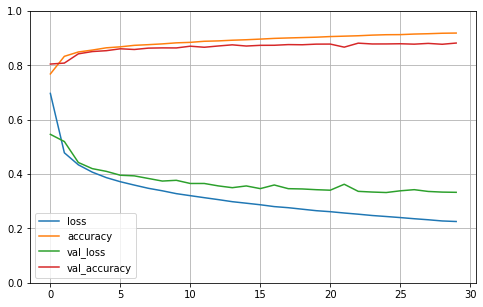

In [0]:
pd.DataFrame(hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

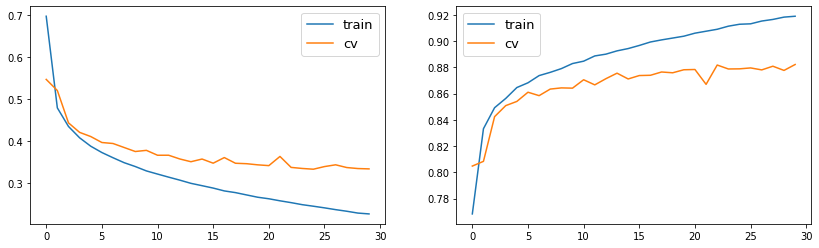

In [0]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(hist["loss"], label="train")
ax[0].plot(hist["val_loss"], label="cv")
ax[0].legend(fontsize=13)

ax[1].plot(hist["accuracy"], label="train")
ax[1].plot(hist["val_accuracy"], label="cv")
ax[1].legend(fontsize=13)

In [0]:
#iniciamos con las predicciones
np.array(class_names) [model.predict(X_test[[6]]).argmax()]

'Coat'

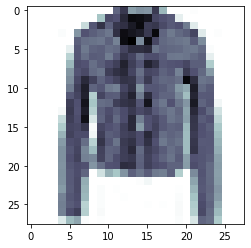

In [0]:
plt.imshow(X_test[10], cmap="bone_r")

In [0]:
predicted_classes = model.predict(X_test)

In [0]:
predict_label = np.zeros(10000)
predict_label.shape

In [0]:
for val in range(predicted_classes.shape[0]):
    predict_label[val]= predicted_classes[val].argmax()

In [0]:
confusion_matrix(y_test,predict_label)

array([[922,   6,  13,   6,   8,   1,  34,   0,  10,   0],
       [  2, 985,   0,   5,   4,   0,   2,   0,   2,   0],
       [ 30,   5, 703,   5, 193,   0,  59,   0,   5,   0],
       [ 67,  48,  21, 759,  80,   0,  17,   0,   8,   0],
       [  3,   3,  37,   9, 909,   0,  35,   0,   4,   0],
       [  1,   0,   0,   0,   0, 949,   0,  10,   9,  31],
       [239,   6,  65,  11, 124,   0, 542,   0,  13,   0],
       [  0,   0,   0,   0,   0,  21,   0, 856,   8, 115],
       [ 10,   1,   2,   1,   8,   2,   2,   2, 970,   2],
       [  1,   0,   0,   0,   0,   4,   0,  12,   0, 983]])

In [0]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
#     print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix


(-0.5, 9.5, 9.5, -0.5)

<Figure size 1440x1440 with 0 Axes>

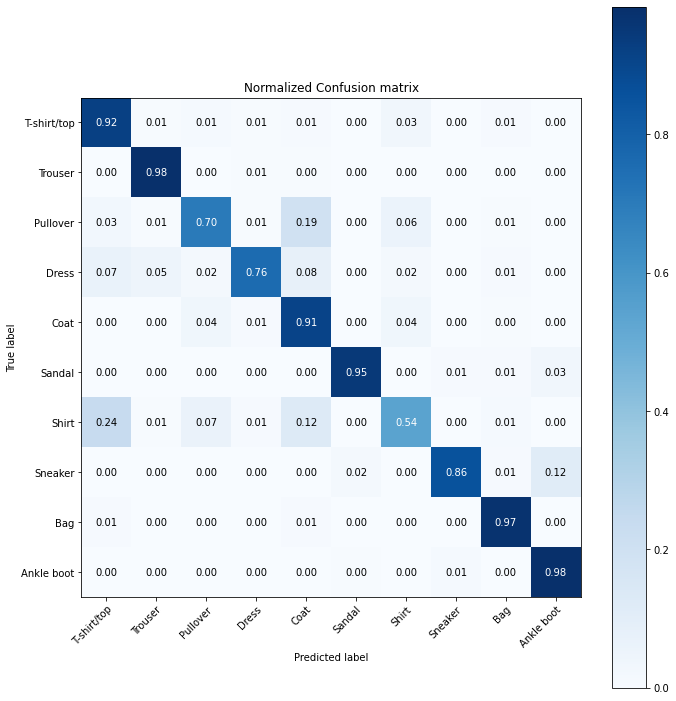

In [0]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predict_label, classes=class_names, normalize=True,title='Normalized Confusion matrix')
plt.axis('on')

In [0]:
print("Classification Report\n",classification_report(y_test, predict_label))
print("\n")
print("Accuracy : ",accuracy_score(y_test, predict_label)*100)

Classification Report
               precision    recall  f1-score   support

           0       0.72      0.92      0.81      1000
           1       0.93      0.98      0.96      1000
           2       0.84      0.70      0.76      1000
           3       0.95      0.76      0.85      1000
           4       0.69      0.91      0.78      1000
           5       0.97      0.95      0.96      1000
           6       0.78      0.54      0.64      1000
           7       0.97      0.86      0.91      1000
           8       0.94      0.97      0.96      1000
           9       0.87      0.98      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



Accuracy :  85.78


## Tarea:

1. Mejorar el modelo respecto a `X_test`. Pueden modificar la arquitectura como ustedes quieran
2. Validar accuracy
3. Crear matriz de confusión

In [0]:
X_cv, X_test = X_test[7000:], X_test[:7000]
y_cv, y_test = y_test[7000:], y_test[:7000]

In [0]:
#Definimos la funcion para generar las NN
def my_nn(activation="relu", optimizer="sgd", layers=(300, 100)):
  Xin = Input(shape=(28, 28))
  X = Flatten()(Xin)
  for layer in layers:
    X = Dense(layer, activation=activation)(X)
  X = Dense(10, activation="softmax")(X)

  model = Model(inputs=Xin, outputs=X)

  model.compile(optimizer=optimizer,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
  
  return model

In [9]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 688), started 0:12:45 ago. (Use '!kill 688' to kill it.)

<IPython.core.display.Javascript object>

In [0]:
logdir = os.path.join("logs", datetime.now().strftime("%Y%m%d-%H%M%S"))
logdir = os.path.join("logs", "run_1")

tensorflow_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20)

In [66]:
tf.keras.backend.clear_session()
model = my_nn(layers=(400,300,200,200,50),optimizer="nadam")
model.fit(x=X_train , y=y_train,
          epochs=300,
          #batch_size=1,
          validation_data=(X_cv , y_cv),
          callbacks=[tensorflow_callback, stopping_callback])

Epoch 1/300
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4892 - accuracy: 0.8235 - val_loss: 0.3899 - val_accuracy: 0.8550
Epoch 2/300
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3623 - accuracy: 0.8680 - val_loss: 0.3558 - val_accuracy: 0.8703
Epoch 3/300
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3245 - accuracy: 0.8809 - val_loss: 0.3409 - val_accuracy: 0.8763
Epoch 4/300
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3040 - accuracy: 0.8888 - val_loss: 0.3171 - val_accuracy: 0.8850
Epoch 5/300
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2872 - accuracy: 0.8943 - val_loss: 0.3161 - val_accuracy: 0.8863
Epoch 6/300
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2726 - accuracy: 0.8986 - val_loss: 0.3148 - val_accuracy: 0.8900
Epoch 7/300
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2621 - accuracy: 0.9029 - val_loss: 0.3189 - val_a

In [67]:
hist = model.history.history
hist.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

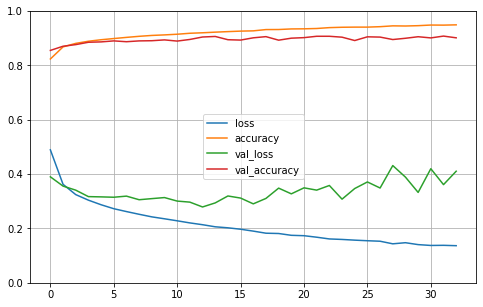

In [68]:
pd.DataFrame(hist).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [0]:
#ejecutar este comando para importar el modelo entrenado
#from tensorflow.keras.models import load_model
#model = load_model("/content/drive/My Drive/Colab Notebooks/DL_HW2_v6.h5")

In [70]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("TEST_LOSS: ", test_loss)
print("TEST_ACCURACY: ", test_accuracy)

219/219 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.8887
TEST_LOSS:  0.5330435633659363
TEST_ACCURACY:  0.8887143135070801


In [0]:
y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

Normalized confusion matrix


(-0.5, 9.5, 9.5, -0.5)

<Figure size 720x720 with 0 Axes>

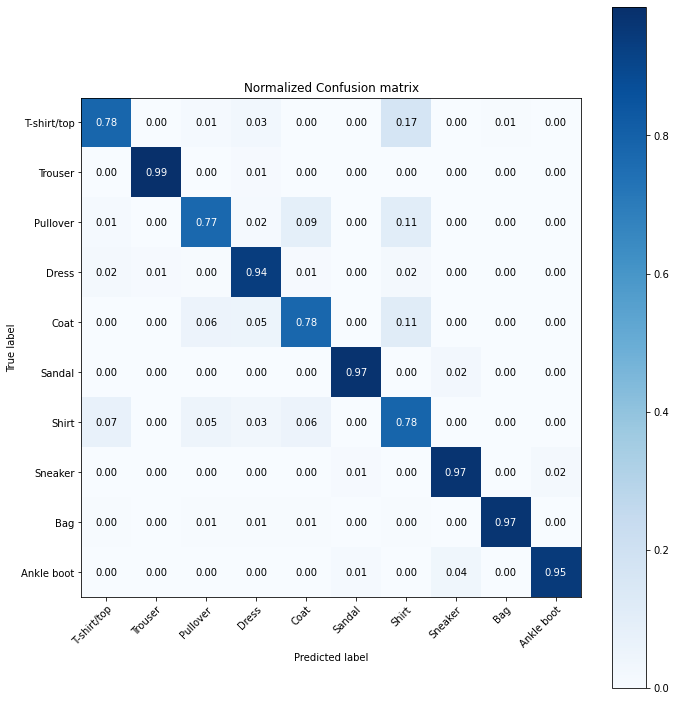

In [78]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title='Normalized Confusion matrix')
plt.axis('on')

In [73]:
confusion_matrix(y_test, y_pred)

array([[537,   1,   8,  20,   2,   1, 115,   0,   4,   0],
       [  0, 672,   0,   6,   2,   0,   1,   0,   0,   0],
       [ 10,   0, 563,  11,  65,   0,  78,   0,   0,   0],
       [ 12,   6,   3, 663,   8,   0,  15,   0,   2,   0],
       [  0,   0,  41,  36, 554,   0,  80,   0,   1,   0],
       [  0,   0,   0,   1,   0, 684,   0,  17,   0,   2],
       [ 51,   0,  33,  24,  39,   0, 543,   0,   2,   0],
       [  0,   0,   0,   0,   0,   7,   0, 671,   0,  15],
       [  3,   1,   5,   4,   4,   1,   3,   2, 685,   1],
       [  1,   0,   0,   0,   0,   9,   0,  26,   0, 649]])

In [74]:
print("Classification Report\n",classification_report(y_test, y_pred))
print("\n")
print("Accuracy : ",accuracy_score(y_test, y_pred)*100)

Classification Report
               precision    recall  f1-score   support

           0       0.87      0.78      0.82       688
           1       0.99      0.99      0.99       681
           2       0.86      0.77      0.82       727
           3       0.87      0.94      0.90       709
           4       0.82      0.78      0.80       712
           5       0.97      0.97      0.97       704
           6       0.65      0.78      0.71       692
           7       0.94      0.97      0.95       693
           8       0.99      0.97      0.98       709
           9       0.97      0.95      0.96       685

    accuracy                           0.89      7000
   macro avg       0.89      0.89      0.89      7000
weighted avg       0.89      0.89      0.89      7000



Accuracy :  88.87142857142857


In [0]:
model.save("/content/drive/My Drive/Colab Notebooks/DL_HW2_v6.h5")